# **Ejercicios de pair programming Módulo 3 Sprint 1**
## **Regresión lineal: Lección 1**
### **Machine Learning: Introducción**

---

Empezamos una nueva lección, y este es el momento de poner en práctica los conocimientos adquiridos sobre la Regresión Lineal Simple I. Para ello os vamos a pedir que por vuestra cuenta busqueis un dataset que os guste, por ejemplo de Kaggle o de donde queráis extraerlo. De forma que vamos a probar a realizar ajustes lineales con el fin de predecir alguna de sus variables. Este dataset será el que iremos usando a lo largo de todas las sesiones de pairprogramming de regresión lineal.

Se ruega a la hora de realizar la entrega que incluyais el conjunto de datos que hayais decidido emplear para estos ejercicios.


In [1]:
# Tratamiento de los datos
# ============================================
import pandas as pd
import numpy as np

# Librerías para la visualización de los datos
# ============================================
import matplotlib.pyplot as plt
import seaborn as sns

# Configuración warnings
# ======================
import warnings
warnings.filterwarnings('ignore')

# Librería patra gestión de nulos
# ======================
from sklearn.impute import KNNImputer

# Para utilizar expresiones regulares
# ======================
import re

# Establecer tamaño fijo de gráficas
# ==================================
plt.rcParams["figure.figsize"] = (10,8)

# Para ver todas las columnas
# ==================================
pd.options.display.max_columns = None


**Objetivos**

1. Buscar un conjunto de datos a analizar:
- Es necesario que el conjunto de datos a analizar tenga variables numéricas y categóricas, primando que haya más de una variable de tipo numérico. Ya que tambien se utilizarán serán útiles a la hora de realizar predicciones en las clases de regresión lineal múltiple. Así mismo se recomienda que los datasets esten ligeramente limpios para facilitar los análisis.


In [3]:
df_socio = pd.read_csv("../datos/soci_econ_country_profiles.csv", index_col=0)
df_socio.head()

,country,Region,Surface area (km2),Population in thousands (2017),"Population density (per km2, 2017)","Sex ratio (m per 100 f, 2017)",GDP: Gross domestic product (million current US$),"GDP growth rate (annual %, const. 2005 prices)",GDP per capita (current US$),Economy: Agriculture (% of GVA),Economy: Industry (% of GVA),Economy: Services and other activity (% of GVA),Employment: Agriculture (% of employed),Employment: Industry (% of employed),Employment: Services (% of employed),Unemployment (% of labour force),Labour force participation (female/male pop. %),Agricultural production index (2004-2006=100),Food production index (2004-2006=100),International trade: Exports (million US$),International trade: Imports (million US$),International trade: Balance (million US$),"Balance of payments, current account (million US$)",Population growth rate (average annual %),Urban population (% of total population)_x,Urban population growth rate (average annual %),"Fertility rate, total (live births per woman)","Population age distribution (0-14 / 60+ years, %)",International migrant stock (000/% of total pop.),Refugees and others of concern to UNHCR (in thousands),Infant mortality rate (per 1000 live births,Health: Total expenditure (% of GDP),Health: Physicians (per 1000 pop.),Education: Government expenditure (% of GDP),Education: Primary gross enrol. ratio (f/m per 100 pop.),Education: Secondary gross enrol. ratio (f/m per 100 pop.),Education: Tertiary gross enrol. ratio (f/m per 100 pop.),Seats held by women in national parliaments %,Mobile-cellular subscriptions (per 100 inhabitants),Mobile-cellular subscriptions (per 100 inhabitants).1,Individuals using the Internet (per 100 inhabitants),Threatened species (number),Forested area (% of land area),CO2 emission estimates (million tons/tons per capita),"Energy production, primary (Petajoules)",Energy supply per capita (Gigajoules),"Pop. using improved drinking water (urban/rural, %)","Pop. using improved sanitation facilities (urban/rural, %)",Net Official Development Assist. received (% of GNI),Quality Of Life Index,Purchasing Power Index,Safety Index,Health Care Index,Cost of Living,Property price to income ratio,Traffic commute time index,Pollution index,Climate index,Gross Rental Yield City Center,Gross Rental Yield Outside Center,Property Price to Rent Ratio City Center,Property Price to Rent Ratio Outside Center,Mortgate as percentage of income,Affordability Index,Cost Of Living Index,Rent Index,Cost Of Living Plus Rent Index,Grocery Index,Restaurant Price Index,Local Purchasing Power Index,Access to electricity (% of population),Adjusted net national income per capita (constant 2010 US$),Age dependency ratio (% of working-age population),"Air transport, freight (million ton-km)","Air transport, passengers carried",Commercial service exports (current US$),Commercial service imports (current US$),Consumer price index (2010 = 100),Current account balance (% of GDP),Current health expenditure (% of GDP),Exports of goods and services (% of GDP),Gross domestic savings (% of GDP),High-technology exports (current US$),Human capital index (HCI) (scale 0-1),Imports of goods and services (% of GDP),"Inflation, consumer prices (annual %)","Life expectancy at birth, female (years)","Life expectancy at birth, male (years)","Life expectancy at birth, total (years)",Military expenditure (% of GDP),"Population, female","Population, male",Tax revenue (% of GDP),"Taxes on income, profits and capital gains (% of revenue)",Urban population (% of total population)_y
0,Argentina,SouthAmerica,2780400,44271,16.2,95.9,632343,2.4,14564.5,6.0,27.8,66.2,2.0,24.8,73.1,6.5,48.6/74.4,119,119,57733,55610,2124,-15944,1.0,91.8,1.0,2.3,24.9/15.4,2086.3/4.8,5.0,13.7,4.8,3.8,5.3,109.8/110.2,110.3/103.4,102.9/63.5,38.9,143.9,69.4,256,10.0,204.0/4.7,3167,85,99.0/100.0,96.2/98.3,0.01,-99,139.59,58.40,37.37,73.30,52.57,12.07,37.95,53.33,90.67,3.77,3.90,26.53,25.64,333.23,0.30,52.57,13.92,34.05,44.06,50.37,58.40,100.0,909

>Después de explorar el dataset, decidimos establecer como variable respuesta: 'Life expectancy at birth, total (years)

In [4]:
df_socio.columns

Index(['country', 'Region', 'Surface area (km2)',
       'Population in thousands (2017)', 'Population density (per km2, 2017)',
       'Sex ratio (m per 100 f, 2017)',
       'GDP: Gross domestic product (million current US$)',
       'GDP growth rate (annual %, const. 2005 prices)',
       'GDP per capita (current US$)', 'Economy: Agriculture (% of GVA)',
       'Economy: Industry (% of GVA)',
       'Economy: Services and other activity (% of GVA)',
       'Employment: Agriculture (% of employed)',
       'Employment: Industry (% of employed)',
       'Employment: Services (% of employed)',
       'Unemployment (% of labour force)',
       'Labour force participation (female/male pop. %)',
       'Agricultural production index (2004-2006=100)',
       'Food production index (2004-2006=100)',
       'International trade: Exports (million US$)',
       'International trade: Imports (million US$)',
       'International trade: Balance (million US$)',
       'Balance of payments, curren

In [5]:
# Hacemos un filtrado para quedranos las  columnas que nos parecen interesantes en un inicio
# ==============================================================================

df_socio = df_socio.filter(['country','Region', 'Population in thousands (2017)', 'Population density (per km2, 2017)', 'Urban population (% of total population)_y','GDP per capita (current US$)', 'Health: Total expenditure (% of GDP)', 'Current health expenditure (% of GDP)','Health Care Index', 'Health: Physicians (per 1000 pop.)', 'Quality Of Life Index', 'Purchasing Power Index', 'Safety Index',  'Pop. using improved drinking water (urban/rural, %)', 'Pollution index','Life expectancy at birth, total (years)'])
df_socio.set_index('country')
df_socio.head(5)

,country,Region,Population in thousands (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Current health expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,"Pop. using improved drinking water (urban/rural, %)",Pollution index,"Life expectancy at birth, total (years)"
0,Argentina,SouthAmerica,44271,16.2,91.749,14564.5,4.8,9.124315,73.30,3.8,139.59,58.40,37.37,96.2/98.3,53.33,76.372000
1,Australia,Oceania,24451,3.2,85.904,51352.2,9.4,9.205948,74.25,3.4,176.54,101.94,57.58,100.0/100.0,24.58,82.500000
2,Austria,WesternEurope,8736,106.0,58.094,44117.7,11.2,10.396617,80.91,5.2,190.37,95.66,80.75,100.0/100.0,21.90,81.643902
3,Belarus,EasternEurope,9468,46.7,78.134,5750.8,5.7,5.925786,53.76,4.1,119.23,36.43,77.74,94.1/95.2,39.64,74.129268
4,Belgium,WesternEurope,11429,377.5,97.961,40277.8,10.6,10.338669,78.92,3.0,160.52,91.02,55.49,99.5/99.4,48.92,81.492683


2. Explicar los datos y las variables disponibles en el conjunto de datos seleccionado:
- Esto se hace para que comprendais mejor los datos con los que estais trabajando.
- Realizar un EDA sencillo para la variable dependiente y la variable independiente.

In [6]:
df_socio.shape

(66, 16)

In [7]:
df_socio.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 66 entries, 0 to 65
Data columns (total 16 columns):
 #   Column                                               Non-Null Count  Dtype  
---  ------                                               --------------  -----  
 0   country                                              66 non-null     object 
 1   Region                                               66 non-null     object 
 2   Population in thousands (2017)                       66 non-null     int64  
 3   Population density (per km2, 2017)                   66 non-null     float64
 4   Urban population (% of total population)_y           66 non-null     float64
 5   GDP per capita (current US$)                         66 non-null     float64
 6   Health: Total expenditure (% of GDP)                 66 non-null     float64
 7   Current health expenditure (% of GDP)                65 non-null     float64
 8   Health Care Index                                    66 non-null     flo

In [8]:
df_socio.describe().T

,count,mean,std,min,25%,50%,75%,max
Population in thousands (2017),66.0,86551.363636,238173.608572,1180.00000,7155.000000,18867.000000,65881.500000,1.409517e+06
"Population density (per km2, 2017)",66.0,367.760606,1296.705411,3.20000,46.725000,104.100000,211.325000,8.155500e+03
Urban population (% of total population)_y,66.0,72.319212,17.747912,18.38400,58.596750,75.058000,86.162000,1.000000e+02
GDP per capita (current US$),66.0,23531.648485,20582.322358,1410.40000,6253.775000,15323.500000,40398.550000,8.083110e+04
Health: Total expenditure (% of GDP),66.0,6.043939,13.403308,-99.00000,5.600000,7.450000,9.475000,1.710000e+01
Current health expenditure (% of GDP),65.0,7.424354,2.802068,1.18121,5.344578,7.407464,9.170055,1.706127e+01
Health Care Index,66.0,65.860152,10.095880,36.90000,60.430000,67.150000,73.892500,8.320000e+01
Quality Of Life Index,66.0,134.090455,42.106991,0.00000,102.685000,141.055000,167.110000,1.903700e+02
Purchasing Power Index,66.0,71.386818,29.967676,3.35000,47.707500,70.115000,95.855000,1.380500e+02
Safety Index,66.0,60.630455,14.160485,14.72000,52.712500,60.100000,70.770000,8.430000e+01


In [9]:
df_socio.isnull().sum()

country                                                0
Region                                                 0
Population in thousands (2017)                         0
Population density (per km2, 2017)                     0
Urban population (% of total population)_y             0
GDP per capita (current US$)                           0
Health: Total expenditure (% of GDP)                   0
Current health expenditure (% of GDP)                  1
Health Care Index                                      0
Health: Physicians (per 1000 pop.)                     0
Quality Of Life Index                                  0
Purchasing Power Index                                 0
Safety Index                                           0
Pop. using improved drinking water (urban/rural, %)    0
Pollution index                                        0
Life expectancy at birth, total (years)                0
dtype: int64

In [10]:
df_socio.duplicated().sum()

0

In [11]:
# Pasamos la columa de medicos por 1000 hab. a tipo numérico, puesto que aparece como object.
# ==============================================================================

df_socio["Health: Physicians (per 1000 pop.)"] = pd.to_numeric(df_socio["Health: Physicians (per 1000 pop.)"], errors = 'coerce')

In [12]:
df_socio.head(1)

,country,Region,Population in thousands (2017),"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Current health expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,"Pop. using improved drinking water (urban/rural, %)",Pollution index,"Life expectancy at birth, total (years)"
0,Argentina,SouthAmerica,44271,16.2,91.749,14564.5,4.8,9.124315,73.3,3.8,139.59,58.4,37.37,96.2/98.3,53.33,76.372


In [13]:
# Separamos la columna de suministro de agua potable en urbano y rural y eliminamos la columna que incluye ambas
# ==============================================================================

df_socio[['Pop. using improved drinking water: urban(%)', 'Pop. using improved drinking water: rural (%)' ]] = df_socio['Pop. using improved drinking water (urban/rural, %)'].str.split('/', expand=True)

df_socio.drop("Pop. using improved drinking water (urban/rural, %)", axis = 1, inplace = True)

In [14]:
# Creamos una columna nueva poniendo la población en millones y sustituímos la que lo indica por miles con ella.
# ==============================================================================

df_socio["Population in millions (2017)"] = df_socio["Population in thousands (2017)"] / 1000

df_socio.drop("Population in thousands (2017)", axis = 1, inplace = True)


## **Gestión de nulos**

In [15]:
def reemplazar_puntos(valor):
    """Esta función reemplaza los puntos por Nan.
        Args:
        - El valor que se desee cambiar: debe estar en formato string.
        Returns: np.nan para los valores que son '...' y el valor original para los que no lo son."""
    
    if valor == '...':
        return np.nan
    else:
        return valor
    
    
df_socio = df_socio.applymap(reemplazar_puntos)

In [16]:
# Cambiamos el tipo de las columnas resultantes de tipo object a float
# Hacemos el cambio en este momento porque necesitamos haber reemplazado los puntos por nulos para poder aplicar el cambio de tipo object a float, y necesitamos que estén en float para que el siguiente código se pueda ejecutar.
# ==============================================================================

df_socio[['Pop. using improved drinking water: urban(%)', 'Pop. using improved drinking water: rural (%)' ]] = df_socio[['Pop. using improved drinking water: urban(%)', 'Pop. using improved drinking water: rural (%)' ]].astype('float')

In [17]:
def reemplazar_nulos(valor):
    """Esta función reemplaza los valores numéricos -99 y -99.0 por Nan.
        Args:
        - El valor que se desee cambiar: debe estar en formato numérico.
        Returns: np.nan para los valores que son -99 y -99.0 y el valor original para los que no lo son."""
        
    if valor == -99:
        return np.nan
    elif valor == -99.0:
        return np.nan
    else:
        return valor
    
    
df_socio = df_socio.applymap(reemplazar_nulos)

In [18]:
df_socio.head()

,country,Region,"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Current health expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pollution index,"Life expectancy at birth, total (years)",Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Population in millions (2017)
0,Argentina,SouthAmerica,16.2,91.749,14564.5,4.8,9.124315,73.30,3.8,139.59,58.40,37.37,53.33,76.372000,96.2,98.3,44.271
1,Australia,Oceania,3.2,85.904,51352.2,9.4,9.205948,74.25,3.4,176.54,101.94,57.58,24.58,82.500000,100.0,100.0,24.451
2,Austria,WesternEurope,106.0,58.094,44117.7,11.2,10.396617,80.91,5.2,190.37,95.66,80.75,21.90,81.643902,100.0,100.0,8.736
3,Belarus,EasternEurope,46.7,78.134,5750.8,5.7,5.925786,53.76,4.1,119.23,36.43,77.74,39.64,74.129268,94.1,95.2,9.468
4,Belgium,WesternEurope,377.5,97.961,40277.8,10.6,10.338669,78.92,3.0,160.52,91.02,55.49,48.92,81.492683,99.5,99.4,11.429


In [19]:
df_socio.isnull().sum()

country                                          0
Region                                           0
Population density (per km2, 2017)               0
Urban population (% of total population)_y       0
GDP per capita (current US$)                     0
Health: Total expenditure (% of GDP)             1
Current health expenditure (% of GDP)            1
Health Care Index                                0
Health: Physicians (per 1000 pop.)               7
Quality Of Life Index                            0
Purchasing Power Index                           0
Safety Index                                     0
Pollution index                                  0
Life expectancy at birth, total (years)          0
Pop. using improved drinking water: urban(%)     2
Pop. using improved drinking water: rural (%)    3
Population in millions (2017)                    0
dtype: int64

In [20]:
# Procedemos a la limpieza de nulos con el método KNN
# ==============================================================================

numericas = df_socio.select_dtypes(include=np.number)

imputer = KNNImputer(n_neighbors=5)
imputer.fit(numericas)
imputer.transform(numericas)

numericas = pd.DataFrame(imputer.transform(numericas), columns = numericas.columns)

In [21]:
# Sustituimos las columnas numéricas originales por las nuevas columnas sin nulos
# ==============================================================================

columnas = numericas.columns

df_socio.drop(columnas, axis = 1, inplace=True)

df_socio[columnas] = numericas[columnas]

In [22]:
df_socio.isnull().sum()

country                                          0
Region                                           0
Population density (per km2, 2017)               0
Urban population (% of total population)_y       0
GDP per capita (current US$)                     0
Health: Total expenditure (% of GDP)             0
Current health expenditure (% of GDP)            0
Health Care Index                                0
Health: Physicians (per 1000 pop.)               0
Quality Of Life Index                            0
Purchasing Power Index                           0
Safety Index                                     0
Pollution index                                  0
Life expectancy at birth, total (years)          0
Pop. using improved drinking water: urban(%)     0
Pop. using improved drinking water: rural (%)    0
Population in millions (2017)                    0
dtype: int64

In [23]:
# Añadimos una columna nueva con la categorización del número de médicos por 1000 hab.
# ==============================================================================

df_socio['Quantity of Physicians (per 1000 pop.)'] = pd.qcut(df_socio['Health: Physicians (per 1000 pop.)'], q=4, labels=['Muy pocos', 'Pocos', 'Medios', 'Muchos'])
df_socio.head()

,country,Region,"Population density (per km2, 2017)",Urban population (% of total population)_y,GDP per capita (current US$),Health: Total expenditure (% of GDP),Current health expenditure (% of GDP),Health Care Index,Health: Physicians (per 1000 pop.),Quality Of Life Index,Purchasing Power Index,Safety Index,Pollution index,"Life expectancy at birth, total (years)",Pop. using improved drinking water: urban(%),Pop. using improved drinking water: rural (%),Population in millions (2017),Quantity of Physicians (per 1000 pop.)
0,Argentina,SouthAmerica,16.2,91.749,14564.5,4.8,9.124315,73.30,3.8,139.59,58.40,37.37,53.33,76.372000,96.2,98.3,44.271,Muchos
1,Australia,Oceania,3.2,85.904,51352.2,9.4,9.205948,74.25,3.4,176.54,101.94,57.58,24.58,82.500000,100.0,100.0,24.451,Medios
2,Austria,WesternEurope,106.0,58.094,44117.7,11.2,10.396617,80.91,5.2,190.37,95.66,80.75,21.90,81.643902,100.0,100.0,8.736,Muchos
3,Belarus,EasternEurope,46.7,78.134,5750.8,5.7,5.925786,53.76,4.1,119.23,36.43,77.74,39.64,74.129268,94.1,95.2,9.468,Muchos
4,Belgium,WesternEurope,377.5,97.961,40277.8,10.6,10.338669,78.92,3.0,160.52,91.02,55.49,48.92,81.492683,99.5,99.4,11.429,Medios


In [24]:
# Reordenamos las columnas
# ==============================================================================

df_socio = df_socio.reindex(columns = ['country', 'Region','Population in millions (2017)', 'Population density (per km2, 2017)',
       'Urban population (% of total population)_y',
       'GDP per capita (current US$)', 'Health: Total expenditure (% of GDP)', 'Current health expenditure (% of GDP)', 'Health Care Index',
       'Health: Physicians (per 1000 pop.)','Quantity of Physicians (per 1000 pop.)', 'Quality Of Life Index',
       'Purchasing Power Index', 'Safety Index','Pop. using improved drinking water: urban(%)', 'Pop. using improved drinking water: rural (%)',
       'Pollution index',
       'Life expectancy at birth, total (years)'])

## **Exploración visual**

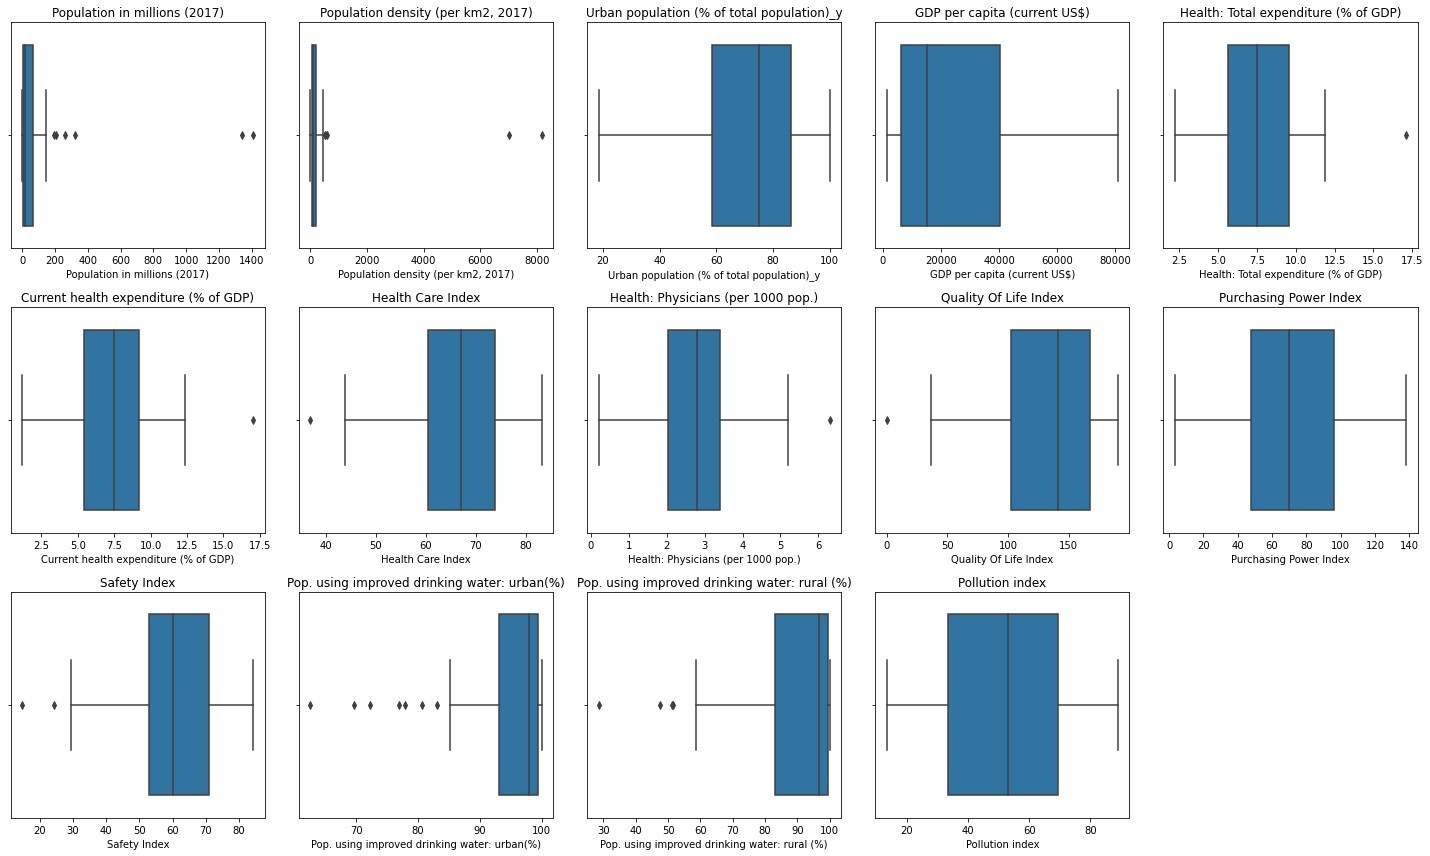

In [25]:
# Numéricas
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20,12))
axes = axes.flat

numericas = df_socio.select_dtypes(include = np.number)
numericas.drop("Life expectancy at birth, total (years)", axis=1, inplace=True)


for i, col in enumerate(numericas):

    sns.boxplot(numericas[col], ax = axes[i])
    axes[i].set_title(col, fontsize = 12)

fig.tight_layout()
fig.delaxes(axes[-1])

>Observamos que tenemos outliers en los boxplot pero hemos decidido no gestionarlos puesto que reflejan una realidad que queremos mantener en nuestro modelo.

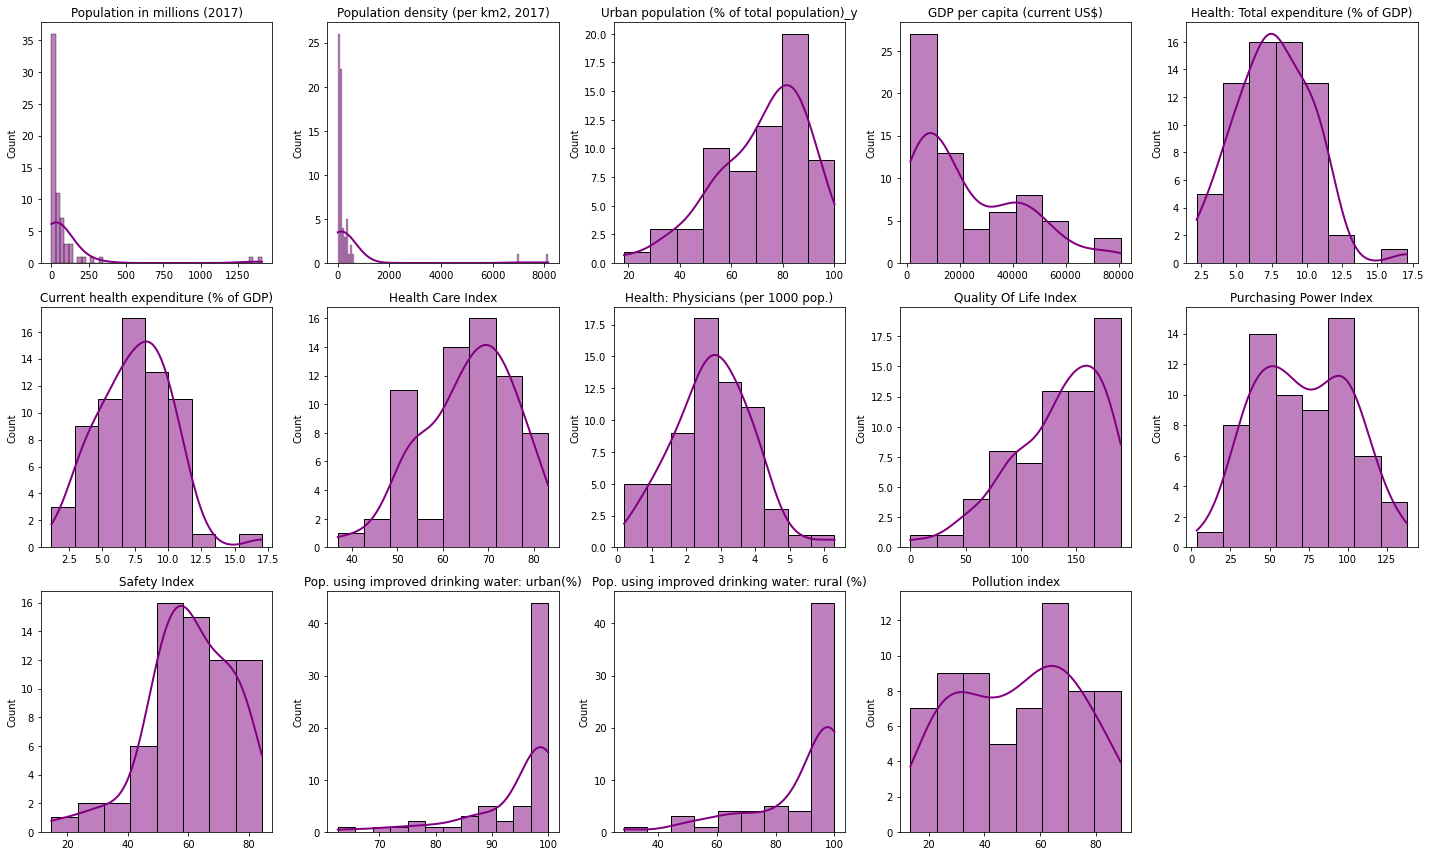

In [26]:
# Gráfico de distribución para cada variable numérica
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20,12))

axes = axes.flat

for i, colum in enumerate(numericas): 
    sns.histplot(data = df_socio, x = colum, kde = True, color = "purple", line_kws = {"linewidth": 2}, alpha = 0.5, ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 12)
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1]);

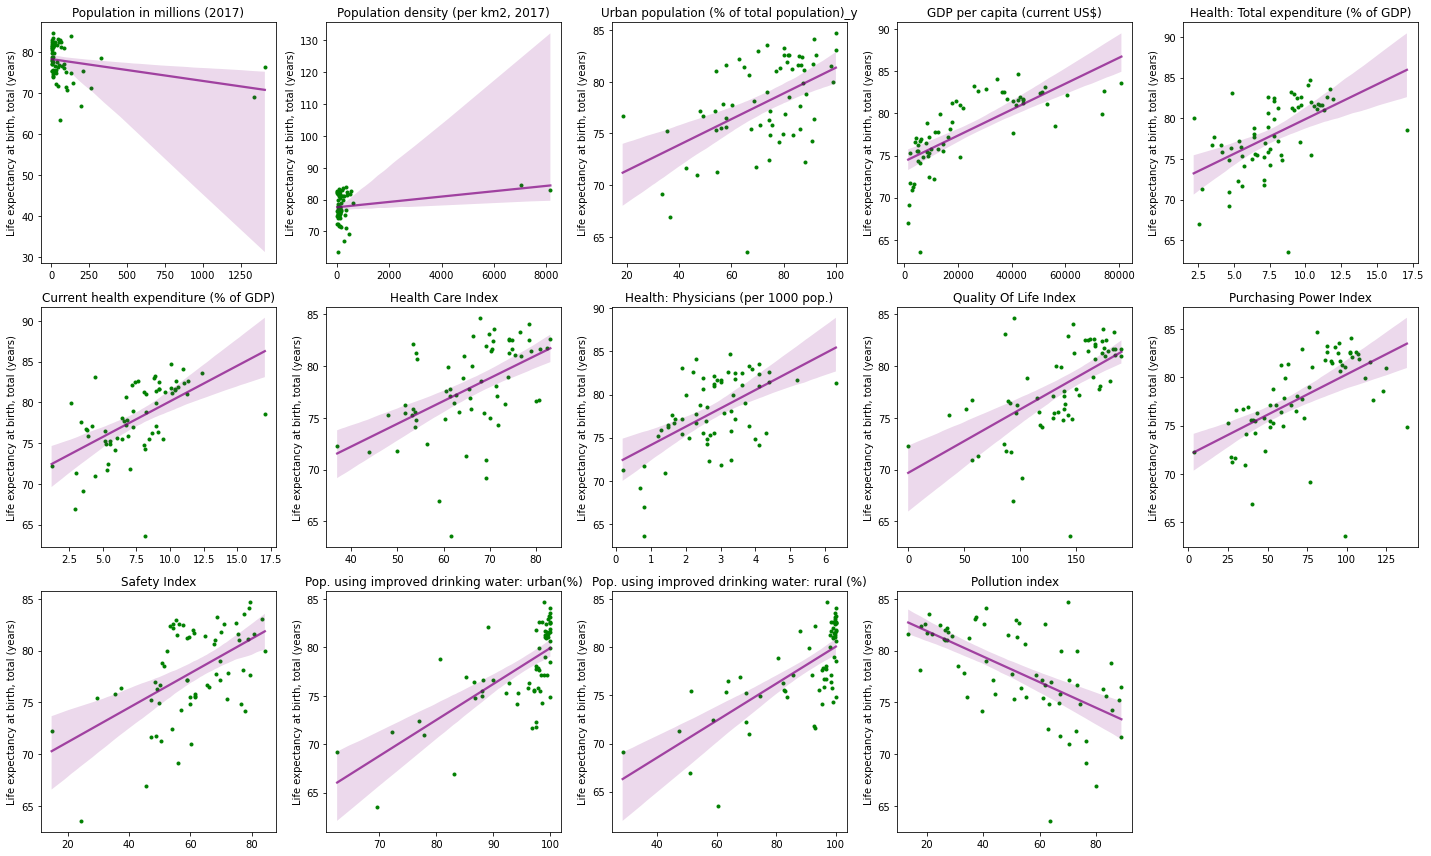

In [27]:
# Gráfico de relación entre variables predictoras y la variable respuesta
# ==============================================================================

fig, axes = plt.subplots(nrows = 3, ncols = 5, figsize = (20,12))

axes = axes.flat

for i, colum in enumerate(numericas): 
    sns.regplot(x = df_socio[colum], y = df_socio['Life expectancy at birth, total (years)'], color = "green", marker = ".",
        scatter_kws = {"alpha": 1}, line_kws = {"color": "purple", "alpha": 0.7 }, ax = axes[i])
    
    axes[i].set_title(colum, fontsize = 12)
    axes[i].tick_params(labelsize = 10)
    axes[i].set_xlabel("")

fig.tight_layout()
fig.delaxes(axes[-1]);

<AxesSubplot:>

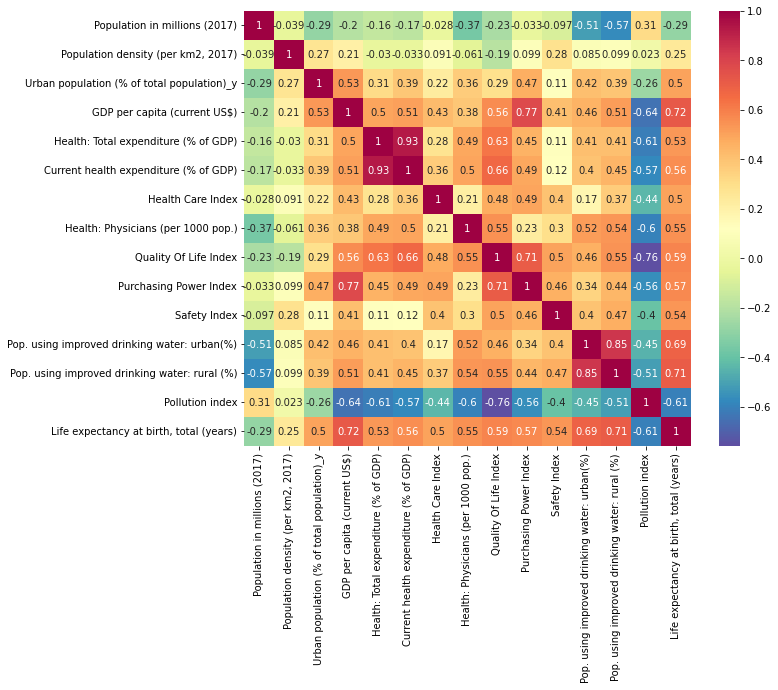

In [28]:
sns.heatmap(df_socio.corr(), cmap='Spectral_r', annot=True)

In [29]:
# Comprobamos que las columnas Health: Total expenditure (% of GDP) y Current health expenditure (% of GDP), 
# tienen una correlación muy alta dónde los datos son prácticamente similares,es decir, muestran la misma información.
# Decidimos prescindir de una de las columnas.
# ==============================================================================


df_socio.drop('Current health expenditure (% of GDP)', axis=1, inplace=True)

In [30]:
# Renombramos nuestras columnas para homogeneizarlas

df_socio.columns = df_socio.columns.str.replace("\(.*\)", "")

nuevas_columnas = {col: col.strip().replace("_", "").replace(" ", "_").replace(",", "").replace(":", "").replace(".", "").lower() for col in df_socio.columns}

df_socio.rename(columns = nuevas_columnas, inplace = True)


In [31]:
df_socio.to_csv('../datos/esperanza_vida.csv')